# Effect of Formation Charge Rate

5/20/2023

Andrew Weng

In [7]:
import os, sys

# Move the path up a level to be able to index into source files
if os.path.basename(os.getcwd()) == 'notebooks':
    os.chdir('../')
    sys.path.insert(0, 'src/')

from src import cellsim as cellsim 

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy.signal import savgol_filter
from src import plotter as plotter

plotter.initialize(plt)

%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Run the simulation

Running with C-rate: 0.05
Running Cyc1: Charge to 4.2V...
Running Cyc1: Discharge to 3.0V...
Running Cyc2: Charge to 4.2V...
Running Cyc2: Discharge to 3.0V...
Running Cyc3: Charge to 4.2V...
Running Cyc3: Discharge to 3.0V...


/Users/aweng/code/formation-modeling/src/cellsim.py:811: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.savefig(f'outputs/figures/{fig_name}.png',


Running with C-rate: 0.1
Running Cyc1: Charge to 4.2V...
Running Cyc1: Discharge to 3.0V...
Running Cyc2: Charge to 4.2V...
Running Cyc2: Discharge to 3.0V...
Running Cyc3: Charge to 4.2V...
Running Cyc3: Discharge to 3.0V...


/Users/aweng/code/formation-modeling/src/cellsim.py:811: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.savefig(f'outputs/figures/{fig_name}.png',


Running with C-rate: 0.2
Running Cyc1: Charge to 4.2V...
Running Cyc1: Discharge to 3.0V...
Running Cyc2: Charge to 4.2V...
Running Cyc2: Discharge to 3.0V...
Running Cyc3: Charge to 4.2V...
Running Cyc3: Discharge to 3.0V...


/Users/aweng/code/formation-modeling/src/cellsim.py:811: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.savefig(f'outputs/figures/{fig_name}.png',


Running with C-rate: 0.5
Running Cyc1: Charge to 4.2V...
Running Cyc1: Discharge to 3.0V...
Running Cyc2: Charge to 4.2V...
Running Cyc2: Discharge to 3.0V...
Running Cyc3: Charge to 4.2V...
Running Cyc3: Discharge to 3.0V...


/Users/aweng/code/formation-modeling/src/cellsim.py:811: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.savefig(f'outputs/figures/{fig_name}.png',


Running with C-rate: 1
Running Cyc1: Charge to 4.2V...
Running Cyc1: Discharge to 3.0V...
Running Cyc2: Charge to 4.2V...
Running Cyc2: Discharge to 3.0V...
Running Cyc3: Charge to 4.2V...
Running Cyc3: Discharge to 3.0V...


/Users/aweng/code/formation-modeling/src/cellsim.py:811: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.savefig(f'outputs/figures/{fig_name}.png',
/Users/aweng/code/formation-modeling/venv/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


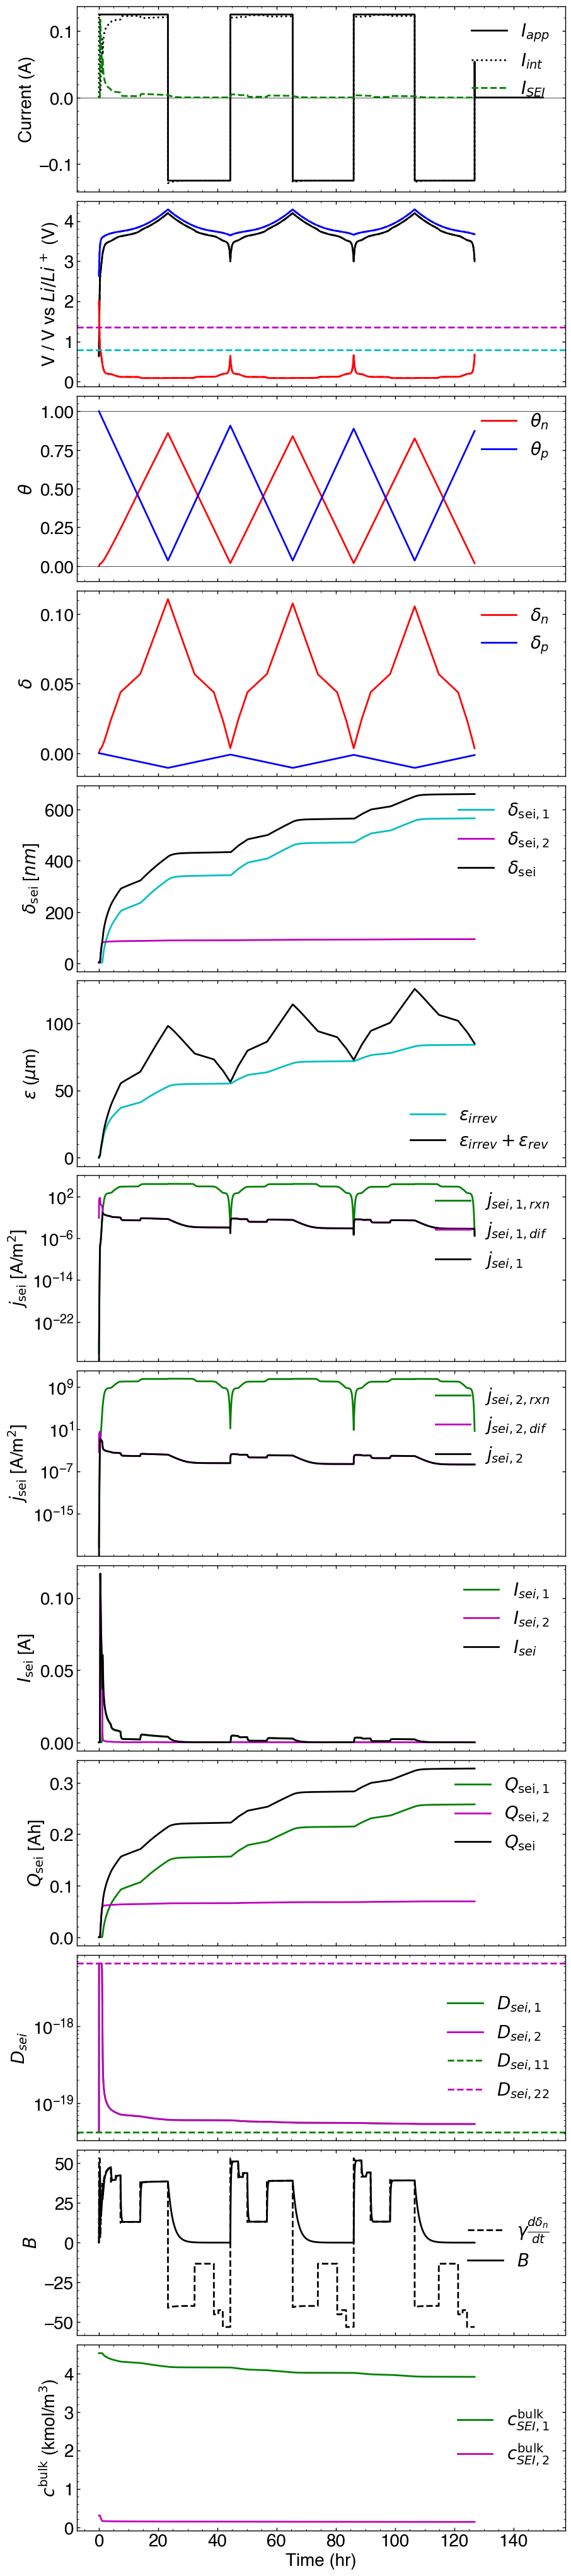

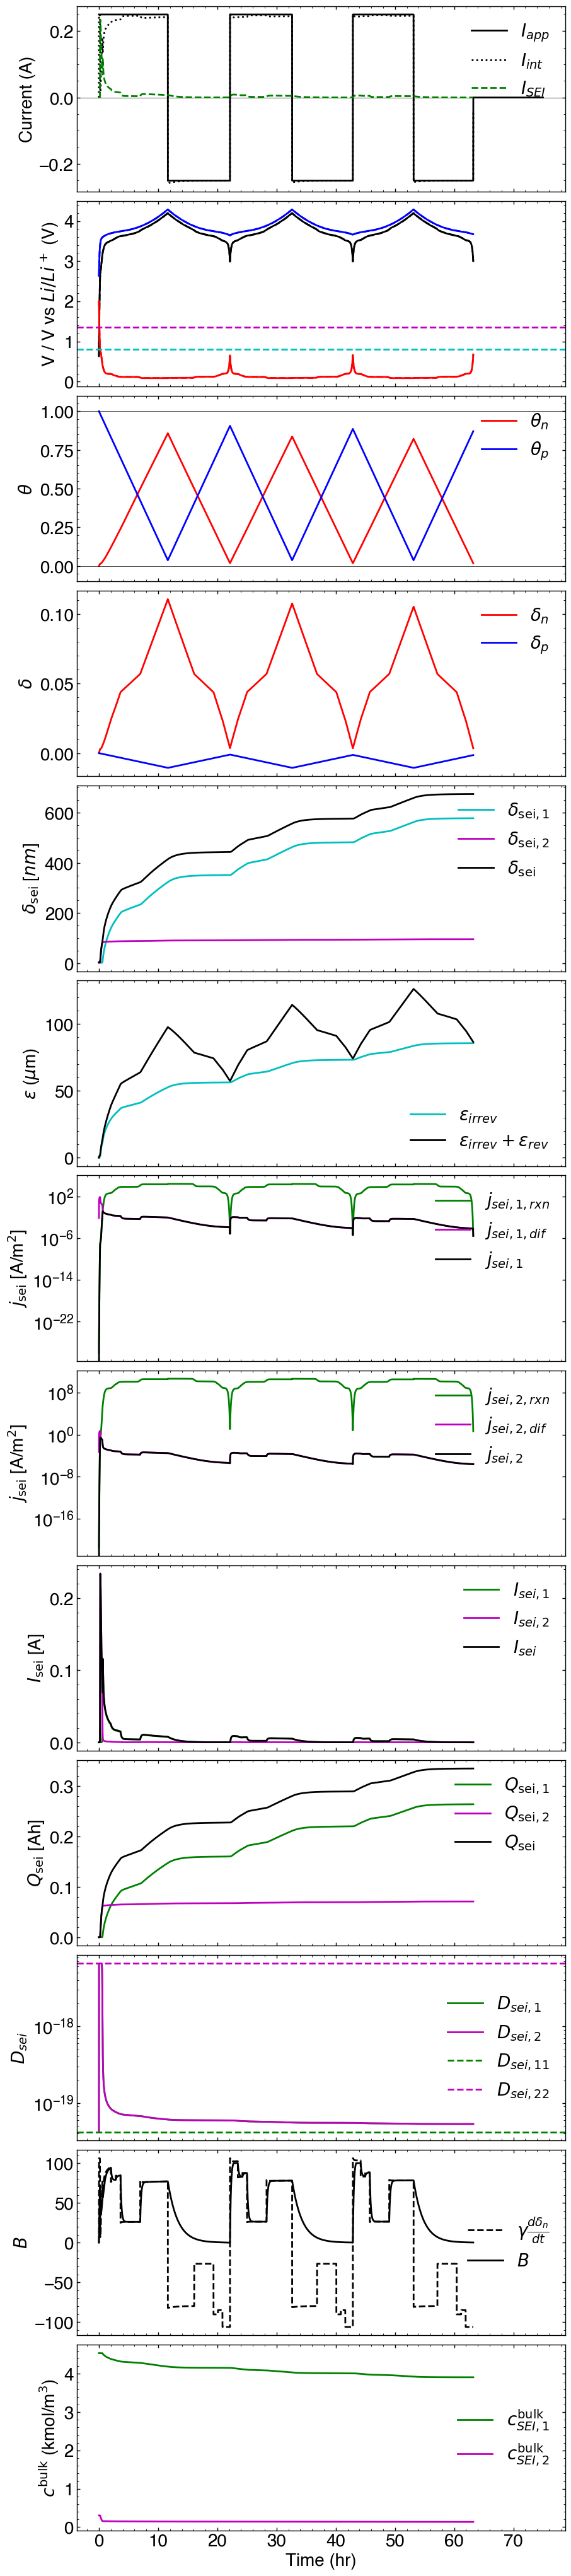

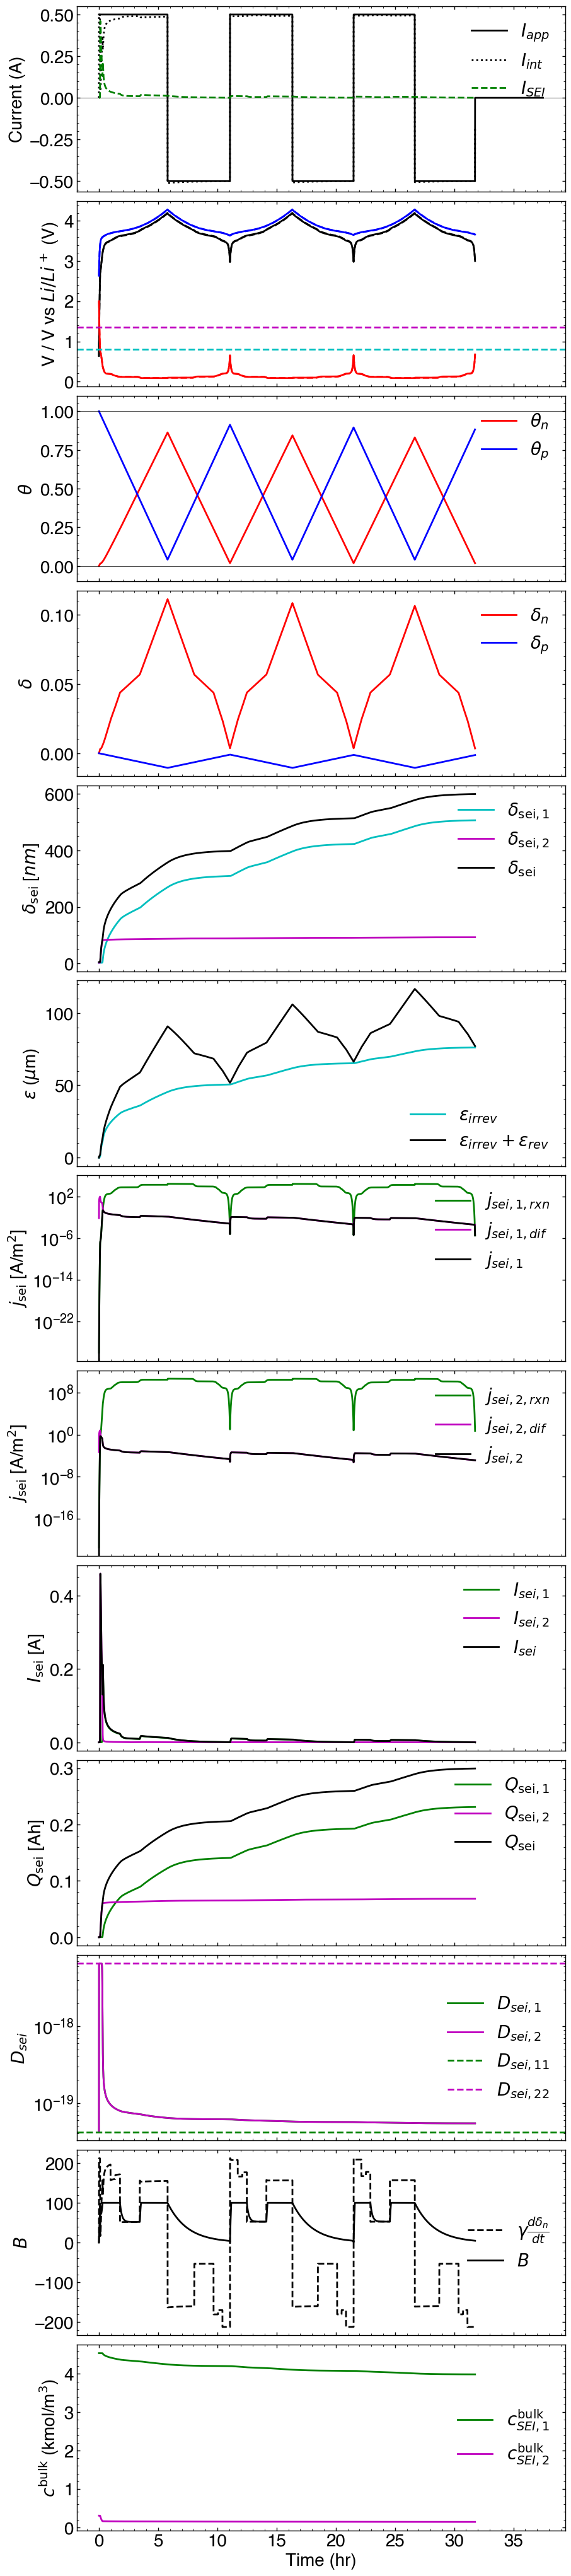

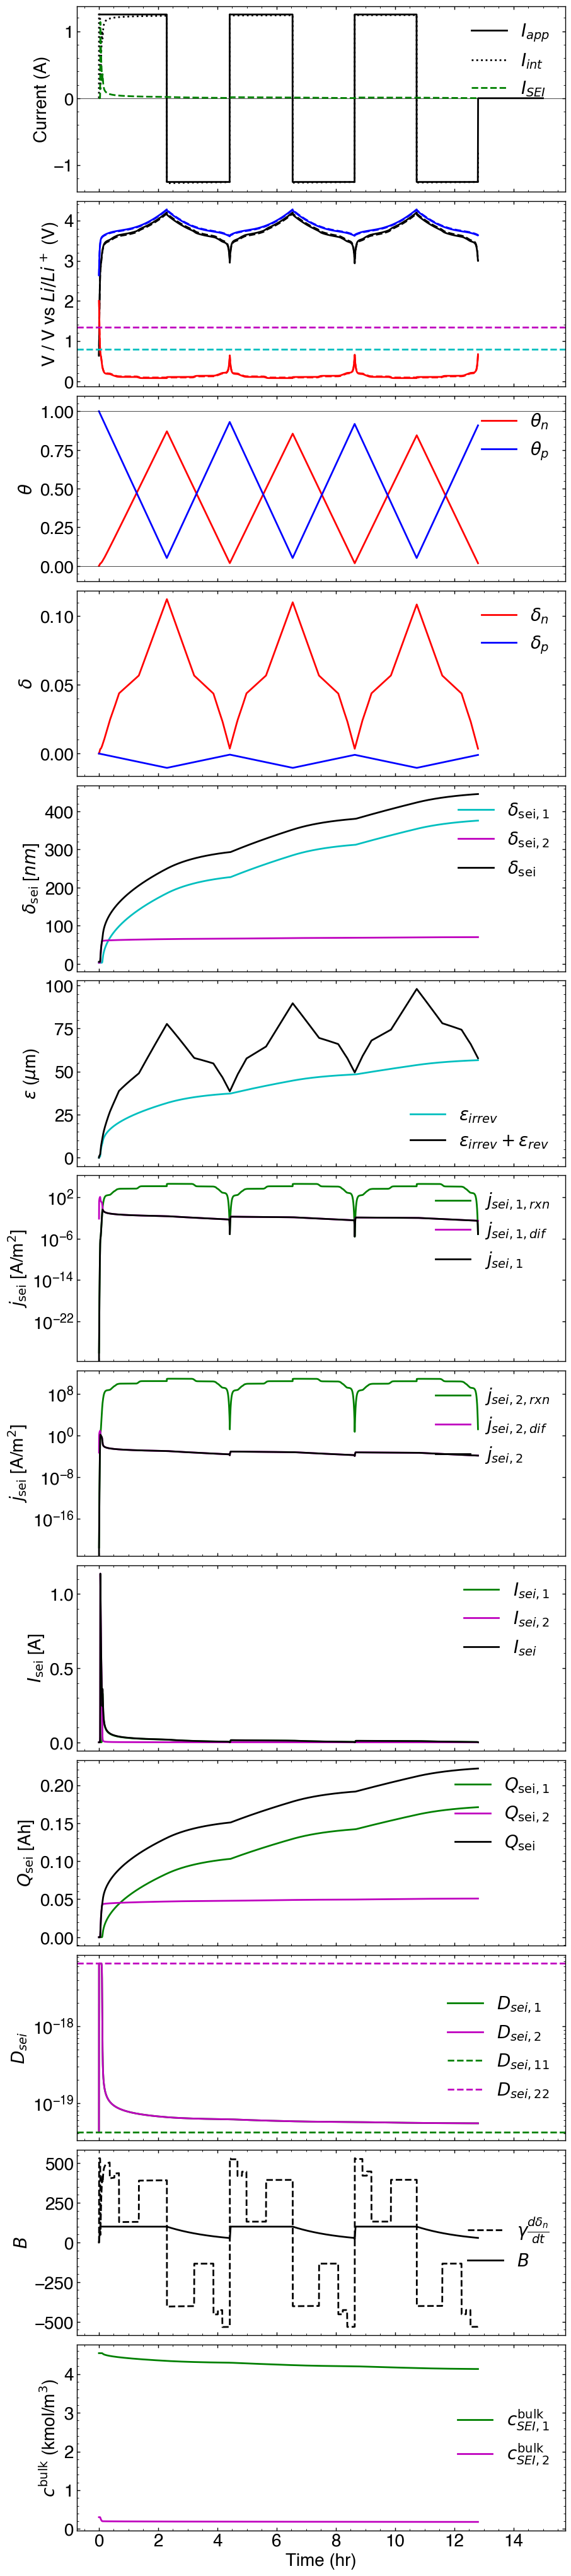

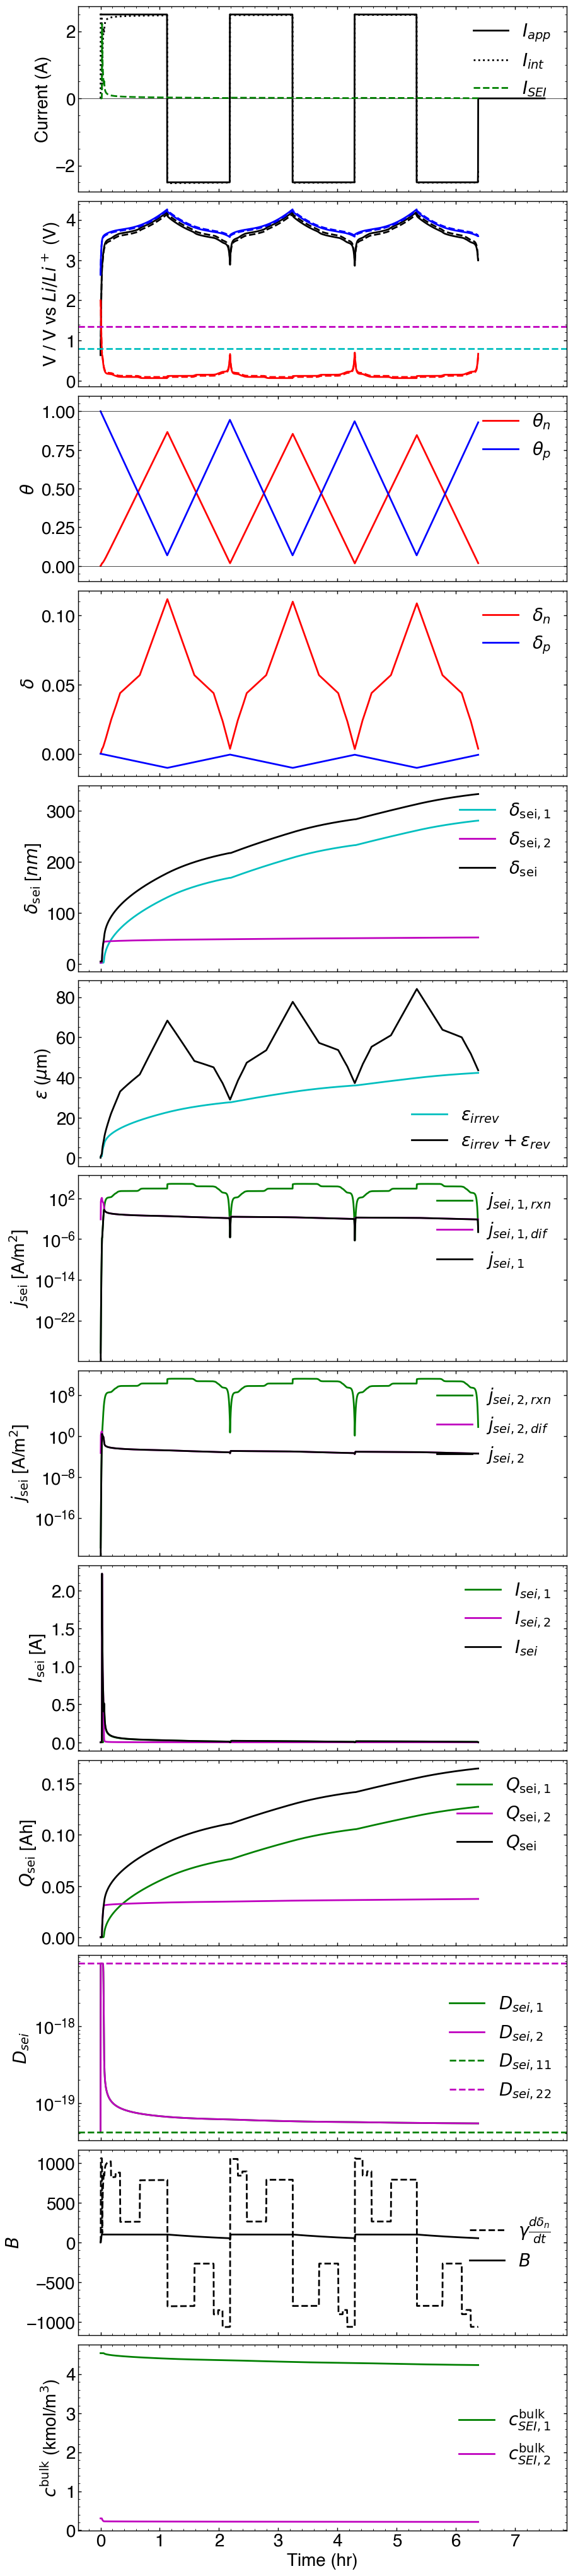

In [9]:
%autoreload 
vmax = 4.2
vmin = 3.0

cell = cellsim.Cell()
cell.load_config('params/default.yaml')
tag = cell.get_tag()

sim_vec = []
df_vec = []
c_rate_vec = [1/20, 1/10, 1/5, 1/2, 1]
q_nom = 2.5

# Formation
for c_rate in c_rate_vec:

    print(f'Running with C-rate: {c_rate}')

    sim = cellsim.Simulation(cell, (3 * q_nom / c_rate) * 3600)
    sim.run_chg_cccv(1, +q_nom * c_rate, +q_nom * c_rate, vmax)
    sim.run_dch_cccv(1, -q_nom * c_rate, -q_nom * c_rate, vmin)
    sim.run_chg_cccv(2, +q_nom * c_rate, +q_nom * c_rate, vmax)
    sim.run_dch_cccv(2, -q_nom * c_rate, -q_nom * c_rate, vmin)
    sim.run_chg_cccv(3, +q_nom * c_rate, +q_nom * c_rate, vmax)
    sim.run_dch_cccv(3, -q_nom * c_rate, -q_nom * c_rate, vmin)

    sim.plot()
    df_vec.append(sim.get_results())
    sim_vec.append(sim)


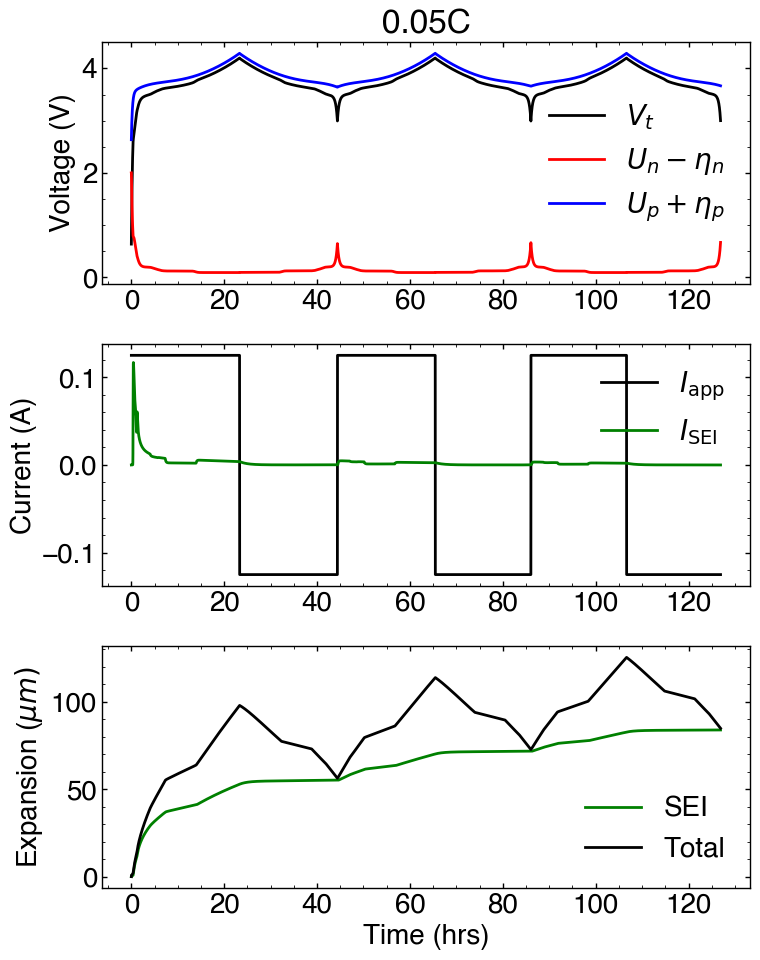

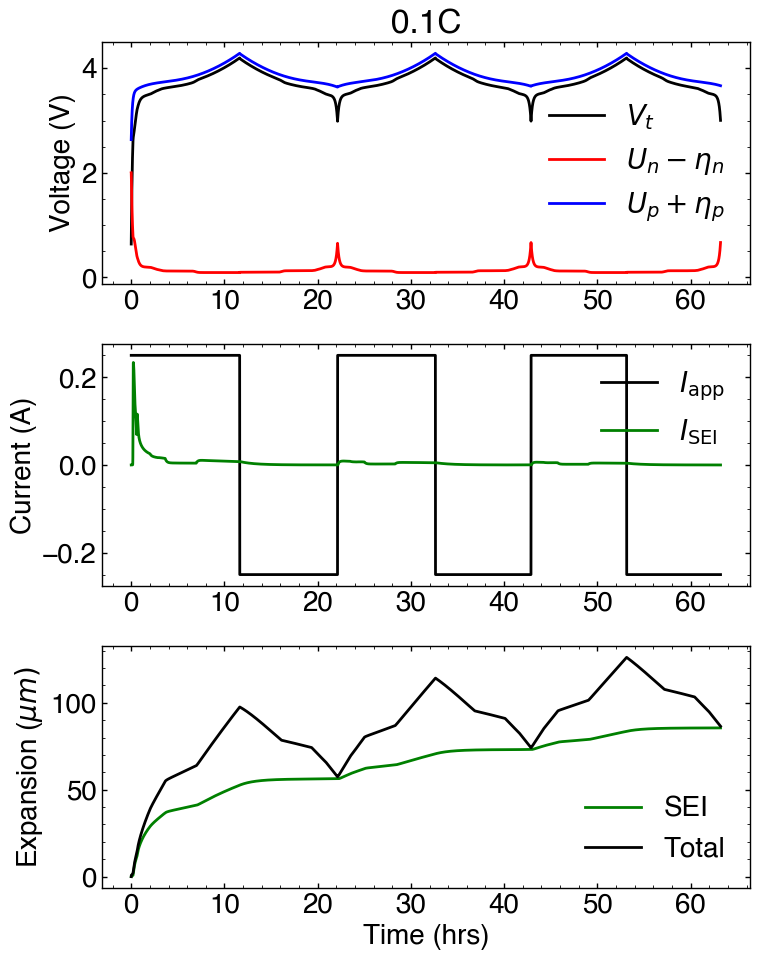

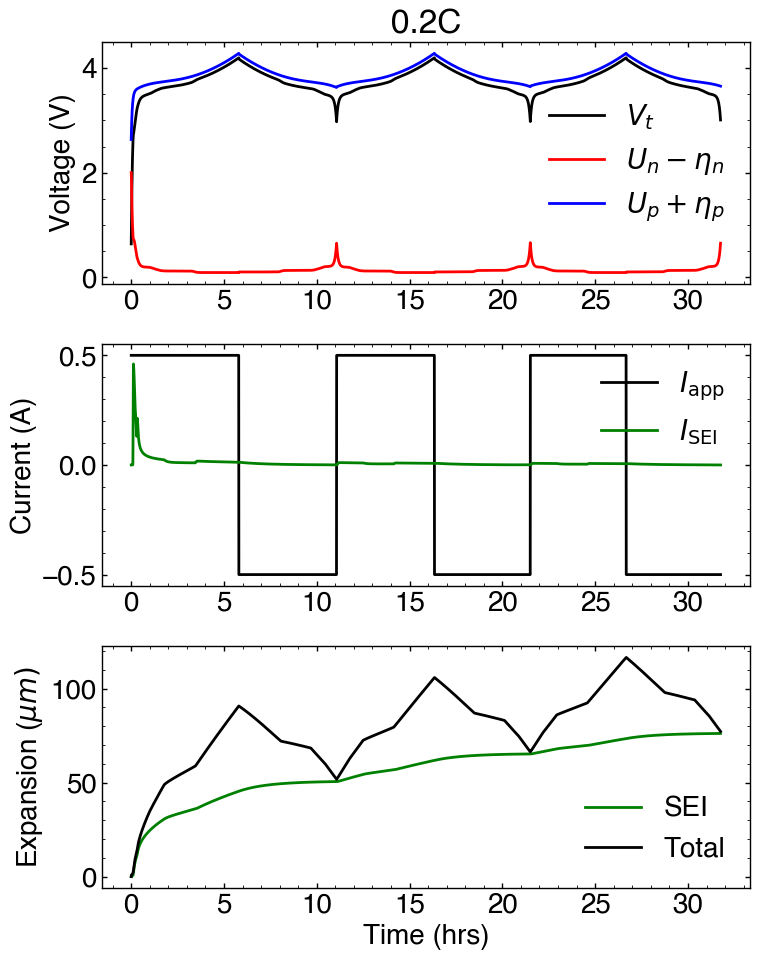

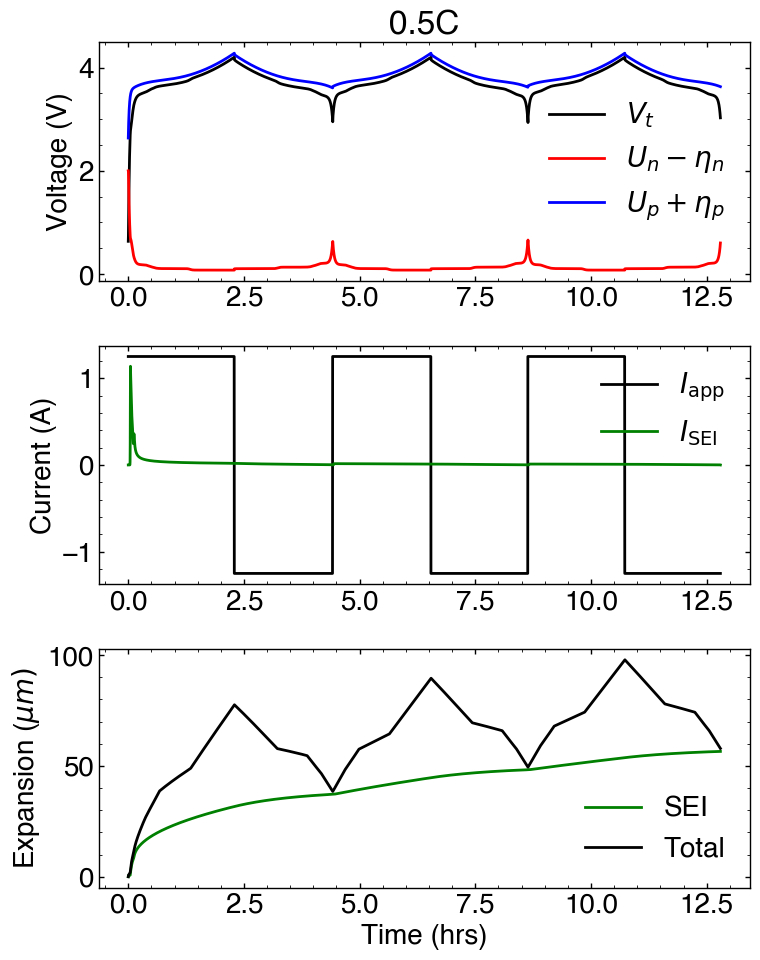

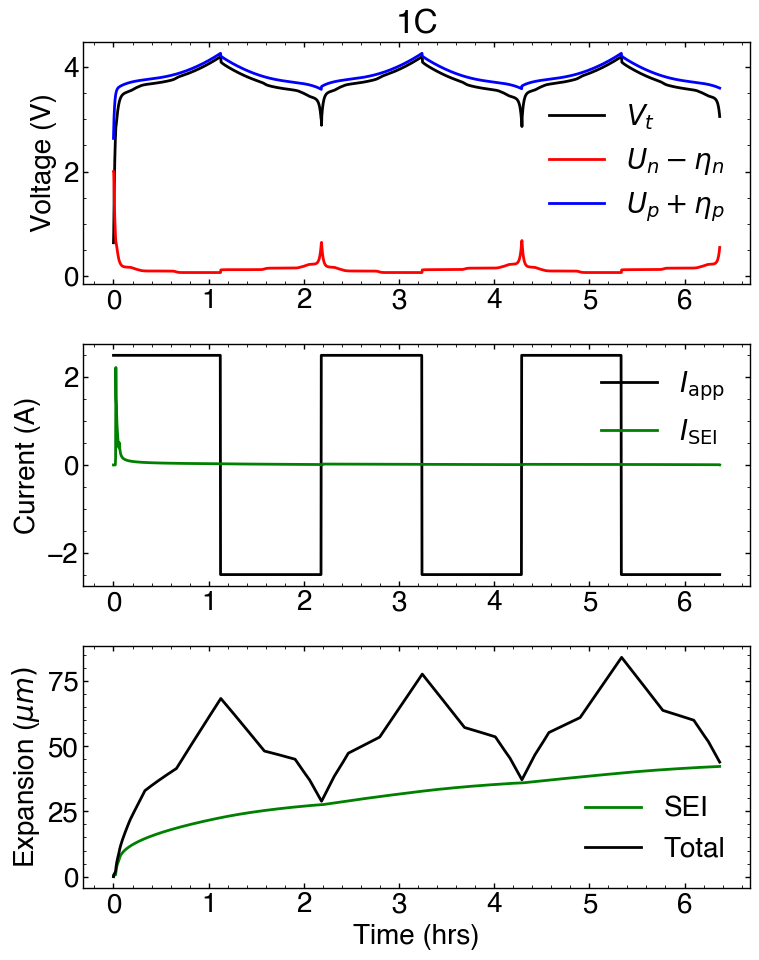

In [ ]:
for df, c_rate, sim in zip(df_vec, c_rate_vec, sim_vec):

    df = df.drop(range(sim.curr_k,len(df)))

    fh, [ax0, ax1, ax2] = plt.subplots(nrows=3, ncols=1, figsize=(8, 10))

    ax0.grid(False)
    ax0.plot(df['t']/3600, df['vt'], label=r'$V_t$', c='k')
    ax0.plot(df['t']/3600, df['ocv_n'] - df['eta_n'], label=r'$U_n - \eta_n$', c='r')
    ax0.plot(df['t']/3600, df['ocv_p'] + df['eta_p'], label=r'$U_p + \eta_p$', c='b')
    ax0.set_title(f'{c_rate}C')
    ax0.set_ylabel('Voltage (V)')
    ax0.legend()

    ax1.grid(False)
    ax1.plot(df['t']/3600, df['i_app'], label=r'$I_\mathrm{app}$', c='k')
    ax1.plot(df['t']/3600, df['i_sei'], label=r'$I_\mathrm{SEI}$', c='g')
    ax1.set_ylabel('Current (A)')
    ax1.legend()
 
    ax2.grid(False)
    ax2.plot(df['t']/3600, df['expansion_irrev']*1e6, label=r'SEI', c='g')
    ax2.plot(df['t']/3600, df['expansion_irrev']*1e6 + \
                           df['expansion_rev']*1e6, label=r'Total', c='k')

    ax2.set_xlabel('Time (hrs)')
    ax2.set_ylabel(r'Expansion ($\mu m)$')
    ax2.legend() 